# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sqlite3
import sqlalchemy

import re
import nltk
nltk.download(['punkt', 'wordnet','stopwords'])


from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import GridSearchCV,train_test_split

[nltk_data] Downloading package punkt to /home/ania/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ania/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ania/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [321]:
# load data from database
sql_engine = create_engine('sqlite:///DisasterResponse.db',echo=False)
connection = sql_engine.raw_connection()  #had to have this line otherwise froze

table_name = str(sql_engine.table_names()[0])
print(table_name)

df = pd.read_sql("SELECT * FROM '{}'".format(table_name),con=connection)

X = df[['id','message','original','genre']]  #remove original
Y = df.drop(columns=['id','message','original','genre'])

data


In [322]:
sql_engine.table_names()

['data']

In [323]:
df.shape

(26216, 40)

In [324]:
df.head(2)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [325]:
X.head(2)

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct


In [326]:
Y.head(2)

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [327]:
Y.describe()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.0,...,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000
mean,0.773650,0.170659,0.004501,0.414251,0.079493,0.050084,0.027617,0.017966,0.032804,0.0,...,0.011787,0.043904,0.278341,0.082202,0.093187,0.010757,0.093645,0.020217,0.052487,0.193584
std,0.435276,0.376218,0.066940,0.492602,0.270513,0.218122,0.163875,0.132831,0.178128,0.0,...,0.107927,0.204887,0.448191,0.274677,0.290700,0.103158,0.291340,0.140743,0.223011,0.395114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [328]:
Y.max()

related                   2
request                   1
offer                     1
aid_related               1
medical_help              1
medical_products          1
search_and_rescue         1
security                  1
military                  1
child_alone               0
water                     1
food                      1
shelter                   1
clothing                  1
money                     1
missing_people            1
refugees                  1
death                     1
other_aid                 1
infrastructure_related    1
transport                 1
buildings                 1
electricity               1
tools                     1
hospitals                 1
shops                     1
aid_centers               1
other_infrastructure      1
weather_related           1
floods                    1
storm                     1
fire                      1
earthquake                1
cold                      1
other_weather             1
direct_report       

In [329]:
(df['id'].value_counts()==1).sum() #some ids doint more than one message ~70

26144

In [330]:
df.shape

(26216, 40)

(array([1., 0., 0., ..., 1., 1., 2.]),
 array([2.00000000e+00, 3.16396154e+00, 4.32792308e+00, ...,
        3.02626721e+04, 3.02638360e+04, 3.02650000e+04]),
 <a list of 26000 Patch objects>)

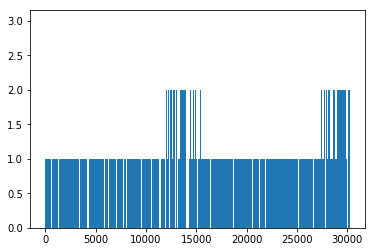

In [331]:
plt.hist(df['id'],bins=26000)

(array([ 6122.,     0.,     0.,     0.,     0., 19906.,     0.,     0.,
            0.,   188.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

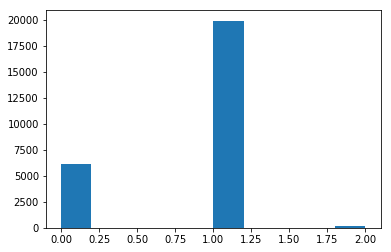

In [332]:
plt.hist(Y['related'])

(array([    0.,     0.,     0.,     0.,     0., 26216.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

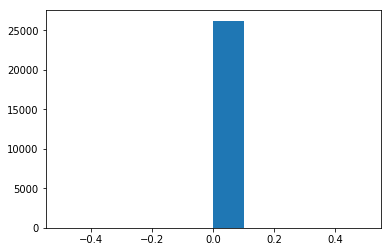

In [333]:
plt.hist(Y['child_alone'])

In [334]:
Y.sum(axis=1)

0         1
1         5
2         1
3         8
4         1
5         0
6         3
7         6
8         0
9         6
10       15
11        0
12        5
13        5
14        1
15        9
16        7
17        0
18        0
19        3
20        1
21        5
22        5
23        4
24        1
25        0
26        8
27        9
28        6
29        5
         ..
26186     3
26187     4
26188     3
26189     0
26190     0
26191     3
26192     1
26193     5
26194     5
26195     0
26196     1
26197     6
26198     5
26199     3
26200     0
26201     3
26202     1
26203     6
26204     0
26205     6
26206     3
26207     3
26208     1
26209     0
26210     1
26211     0
26212     0
26213     1
26214     3
26215     1
Length: 26216, dtype: int64

In [335]:
Y.sum(axis=1).min()

0

In [336]:
Y.sum(axis=1).max()

27

In [337]:
Y[Y.sum(axis=1)==0].describe()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,...,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0,6122.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([6.122e+03, 5.121e+03, 6.310e+02, 0.000e+00, 3.609e+03, 2.276e+03,
        2.956e+03, 0.000e+00, 1.903e+03, 1.347e+03, 8.800e+02, 0.000e+00,
        5.770e+02, 3.440e+02, 1.830e+02, 0.000e+00, 1.070e+02, 5.700e+01,
        3.800e+01, 0.000e+00, 2.000e+01, 8.000e+00, 1.200e+01, 0.000e+00,
        7.000e+00, 5.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
         6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
        13.5 , 14.25, 15.  , 15.75, 16.5 , 17.25, 18.  , 18.75, 19.5 ,
        20.25, 21.  , 21.75, 22.5 , 23.25, 24.  , 24.75, 25.5 , 26.25,
        27.  ]),
 <a list of 36 Patch objects>)

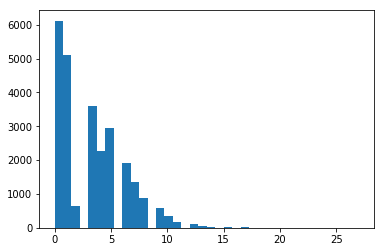

In [338]:
plt.hist(Y.sum(axis=1),bins=36)

In [339]:
col =list(Y.columns)

In [340]:
col

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [341]:
df.shape

(26216, 40)

In [342]:
df[df[col].sum(axis=1)==0].head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,21,I am in Petionville. I need more information r...,M nan pv mvle plis enfomasyon sou 4636,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,28,are you going to call me or do you want me to ...,Eske se rele nap relem oubyen se mwen kap rele...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,30,I don't understand how to use this thing 4636.,Mwen pa konprann koman pou m itilize bagay 463...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [343]:
df['genre'].value_counts()

news      13054
direct    10766
social     2396
Name: genre, dtype: int64

In [344]:
df[df[col].sum(axis=1)==0]['genre'].value_counts()

direct    3452
news      2365
social     305
Name: genre, dtype: int64

In [345]:
df[col].head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
df[col].sum(axis=1)

0         1
1         5
2         1
3         8
4         1
5         0
6         3
7         6
8         0
9         6
10       15
11        0
12        5
13        5
14        1
15        9
16        7
17        0
18        0
19        3
20        1
21        5
22        5
23        4
24        1
25        0
26        8
27        9
28        6
29        5
         ..
26186     3
26187     4
26188     3
26189     0
26190     0
26191     3
26192     1
26193     5
26194     5
26195     0
26196     1
26197     6
26198     5
26199     3
26200     0
26201     3
26202     1
26203     6
26204     0
26205     6
26206     3
26207     3
26208     1
26209     0
26210     1
26211     0
26212     0
26213     1
26214     3
26215     1
Length: 26216, dtype: int64

In [347]:
#df[col].sum(axis=1)
df['count'] = df[col].sum(axis=1)

In [348]:
#df['count']
df[df['count']==0].head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,count
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,21,I am in Petionville. I need more information r...,M nan pv mvle plis enfomasyon sou 4636,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,28,are you going to call me or do you want me to ...,Eske se rele nap relem oubyen se mwen kap rele...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,30,I don't understand how to use this thing 4636.,Mwen pa konprann koman pou m itilize bagay 463...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
df[df['count']==0].index

Int64Index([    5,     8,    11,    17,    18,    25,    30,    32,    52,
               66,
            ...
            26177, 26183, 26189, 26190, 26195, 26200, 26204, 26209, 26211,
            26212],
           dtype='int64', length=6122)

In [350]:
df[df['count']==0].iloc[5]

id                                                        37
message                   Can you tell me about this service
original                  Can you tell me about this service
genre                                                 direct
related                                                    0
request                                                    0
offer                                                      0
aid_related                                                0
medical_help                                               0
medical_products                                           0
search_and_rescue                                          0
security                                                   0
military                                                   0
child_alone                                                0
water                                                      0
food                                                       0
shelter                 

In [351]:
np.random.choice([10,32,15,11,0,9], 3)

array([15, 10,  9])

In [352]:
import numpy as np
x=np.random.choice(list(df[df['count']==0].index),10)
print(df.loc[x].message.values)
#print(df[col].loc[x])


['Where the women will be able to participate in this reamenagement they talking about. '
 'You COIL are a man very sage for me and charming '
 'The project, which started in March 2001, is supporting seven co-operative farms in Kosan County (7,426 farmers, 3,121 ha of arable land and a population of 15,019 persons).'
 'He described the ruling party as monolithic, dictatorial and militarist.'
 'I would like advice on how I can live.'
 'where do I go and get the vaccine? '
 "Since Khatami's 1997 election, his pro-reform supporters have scored major electoral wins in municipal and especially parliamentary elections, winning a majority in the legislature in February, the report said."
 "NOTES: This message isn't important"
 'Is the aimmigration office functioning? '
 'I need the little job to take care myself. Good bless you thank so much. ']


In [353]:
df[df.related==2].describe()

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,count
count,188.000000,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,...,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0
mean,11703.340426,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
std,5479.507080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,146.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
25%,8956.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
50%,13770.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75%,14376.750000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
max,29126.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [354]:
df[df.related==2][['message','original']].head()

,message,original
117,Dans la zone de Saint Etienne la route de Jacm...,Nan zon st. etine rout jakmel la bloke se mize...
219,. .. i with limited means. Certain patients co...,t avec des moyens limites. Certains patients v...
305,The internet caf Net@le that's by the Dal road...,Cyber cafe net@le ki chita rout de dal tou pr ...
460,"Bonsoir, on est a bon repos aprs la compagnie ...",Bonswa nou nan bon repo apri teleko nan wout t...
576,URGENT CRECHE ORPHANAGE KAY TOUT TIMOUN CROIX ...,r et Salon Furterer. mwen se yon Cosmtologue. ...


In [355]:
df.isnull().sum()

id                            0
message                       0
original                  16046
genre                         0
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_in

In [160]:
# import matplotlib.pyplot as plt
# plt.hist(df['index'])

In [356]:
df_twitter = pd.read_csv('Twitter-sentiment-self-drive-DFE.csv')

In [357]:
df_twitter.head()

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


In [358]:
df_twitter.shape

(7156, 12)

# Read data

In [2]:
# load data from database
sql_engine = create_engine('sqlite:///DisasterResponse.db',echo=False)
connection = sql_engine.raw_connection()  #had to have this line otherwise froze

table_name = str(sql_engine.table_names()[0])
print(table_name)

df = pd.read_sql("SELECT * FROM '{}'".format(table_name),con=connection)

data


In [3]:
col = list(set(df.columns)-set(df[['id','message','original','genre']]))
len(col)

36

In [4]:

df = df[(df.related!=2) & (df[col].sum(axis=1)!=0)]
print(df.shape)
X = df[['message']]  #drop original message, and id, also genre since at the end only message text get into the app
Y = df.drop(columns=['id','message','original','genre'])

# X.genre.value_counts()
# news      10671
# direct     7182
# social     2053

(19906, 40)


In [5]:
X.head()

,message
0,Weather update - a cold front from Cuba that c...
1,Is the Hurricane over or is it not over
2,Looking for someone but no name
3,UN reports Leogane 80-90 destroyed. Only Hospi...
4,"says: west side of Haiti, rest of the country ..."


In [6]:
Y.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y.related.max()

1

In [8]:
Y[Y.sum(axis=1)==0]

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


# train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [10]:
X_train.head()

,message
8879,"We are hungry, thirsty, have always had to sle..."
7856,we want medical equipment and supplies needed ...
5235,There are a lot of diseases from infection in ...
17478,"Masturjono, the head of the survey team on ear..."
13424,On the fourth day of the killer quake which ha...


In [11]:
y_train.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
8879,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7856,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5235,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17478,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13424,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
#X_train['genre'].value_counts()/X_train.shape[0]

In [13]:
#X_test['genre'].value_counts()/X_test.shape[0]

In [14]:
y_train.sum(axis=0)/y_train.shape[0]

related                   1.000000
request                   0.224395
offer                     0.006029
aid_related               0.542367
medical_help              0.103825
medical_products          0.065041
search_and_rescue         0.036104
security                  0.024583
military                  0.041195
child_alone               0.000000
water                     0.082792
food                      0.147766
shelter                   0.114341
clothing                  0.020162
money                     0.030411
missing_people            0.014602
refugees                  0.044075
death                     0.060620
other_aid                 0.177574
infrastructure_related    0.084333
transport                 0.059415
buildings                 0.067252
electricity               0.026860
tools                     0.007904
hospitals                 0.013665
shops                     0.005962
aid_centers               0.015875
other_infrastructure      0.056735
weather_related     

In [15]:
(y_train.sum(axis=0)/y_train.shape[0])/(y_test.sum(axis=0)/y_test.shape[0])

related                   1.000000
request                   0.993609
offer                     1.071572
aid_related               0.976968
medical_help              0.967670
medical_products          0.946521
search_and_rescue         0.971301
security                  1.176440
military                  0.836847
child_alone                    NaN
water                     0.945081
food                      1.025707
shelter                   0.937523
clothing                  0.964873
money                     1.009024
missing_people            0.908455
refugees                  1.010888
death                     1.043969
other_aid                 1.111679
infrastructure_related    0.941083
transport                 0.941740
buildings                 1.017360
electricity               1.020493
tools                     0.959478
hospitals                 0.860875
shops                     0.957117
aid_centers               1.097369
other_infrastructure      0.928852
weather_related     

### 2. Write a tokenization function to process your text data

In [16]:
print(stopwords.words('english'))
stopword_list = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [84]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
emails_regex = '[a-zA-Z0-9+_\-\.]+@[0-9a-zA-Z][.-0-9a-zA-Z]*.[a-zA-Z]+'
ips_regex = '(?:[\d]{1,3})\.(?:[\d]{1,3})\.(?:[\d]{1,3})\.(?:[\d]{1,3})'
    
def tokenize(text):
    # get list of all urls using regex

    text = text.replace("(","")
    text = text.replace(")","")  #had to remove paranthesis do to error in urldetection url)

    detected_urls = re.findall(url_regex,text) #all cases of pattern save in string for each case
    detected_emails = re.findall(emails_regex,text)
    detected_emails = [email.split()[0] for email in detected_emails]
    detected_ips = re.findall(ips_regex,text)
            
    
    ##     !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!add also stop words, noun and verb lemmatization
    
    # deal with RT and make category of genre in pipeline
    
    pattern = re.compile(r'[^a-zA-Z0-9]')
    stopword_list = stopwords.words('english')
    
#    replace each url/email/ips in text string with placeholder
    #print(text)
    #print(detected_urls)
    for url in detected_urls:
        
        text = re.sub(url,'urlplaceholder',text)   
                 

    for email in detected_emails:
        
        text = re.sub(email,'emailplaceholder',text)
            

    for ip in detected_ips:
        
        text = re.sub(ip,'ipplaceholder',text)       

        
#     if(len(detected_urls)>0 or len(detected_emails)>0 or len(detected_ips)>0):
        
#         print('--->',detected_urls,detected_emails,detected_ips)            
#         text = text.lower()  
#         print(text)

    for stop_word in stopword_list:
        
        if(stop_word in text):
             text.replace(stop_word,'')
        #print(text)
    #print(text)
    
    text = re.sub(pattern,' ',text)
    
    tokens = word_tokenize(text.lower())
    
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:

        if(tok not in stopword_list):      
    
            clean_tok = lemmatizer.lemmatize(lemmatizer.lemmatize(tok.strip()),pos='v')
            clean_tokens.append(clean_tok)

    return clean_tokens

In [86]:
for message in df.message[0:50]:
    print(tokenize(message))

['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti']
['hurricane']
['look', 'someone', 'name']
['un', 'report', 'leogane', '80', '90', 'destroy', 'hospital', 'st', 'croix', 'function', 'need', 'supply', 'desperately']
['say', 'west', 'side', 'haiti', 'rest', 'country', 'today', 'tonight']
['storm', 'sacred', 'heart', 'jesus']
['please', 'need', 'tent', 'water', 'silo', 'thank']
['croix', 'de', 'bouquet', 'health', 'issue', 'worker', 'santo', '15', 'area', 'croix', 'de', 'bouquet']
['nothing', 'eat', 'water', 'starve', 'thirsty']
['thomassin', 'number', '32', 'area', 'name', 'pyron', 'would', 'like', 'water', 'thank', 'god', 'fine', 'desperately', 'need', 'water', 'thank']
['let', 'together', 'need', 'food', 'delma', '75', 'didine', 'area']
['information', '4636', 'number', 'order', 'participate', 'see', 'use']
['comitee', 'delmas', '19', 'rue', 'street', 'janvier', 'impasse', 'charite', '2', '500', 'people', 'temporary', 'shelter', 'dire', 'need', 'water', 'food', 'm

# count vectorizer

# Tfidf

### 3. Build a machine learning pipeline
- You'll find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [ ]:
pipeline = 

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
parameters = 

cv = 

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.